# NETFLIX STOCK PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor,NearestCentroid
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("C:\\Users\\USER\\Downloads\\NFLX.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df.shape

(1009, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [6]:
df['Date']=pd.to_datetime(df['Date'])

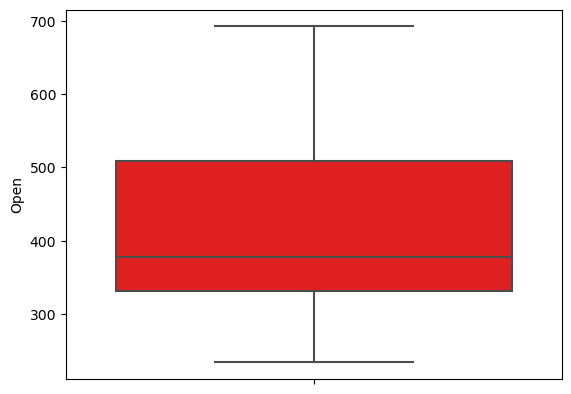

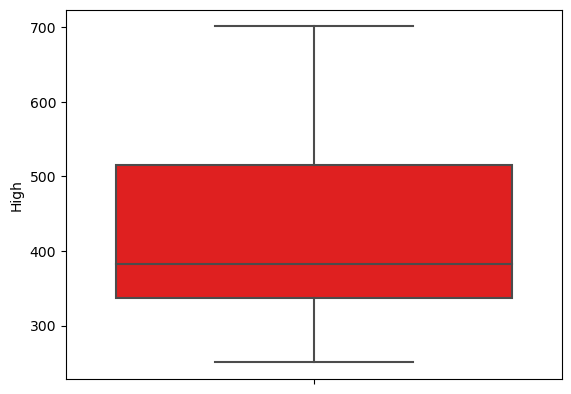

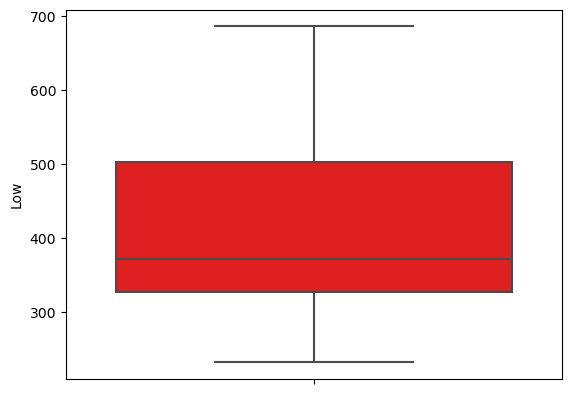

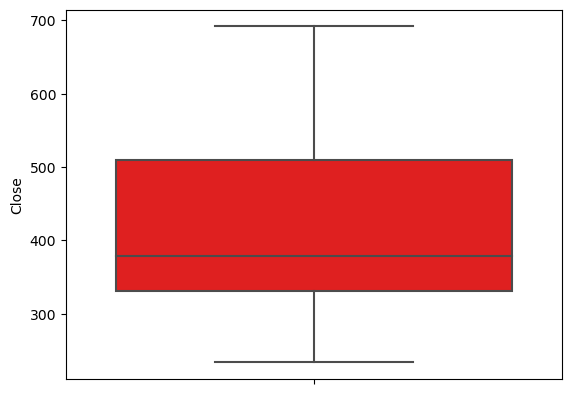

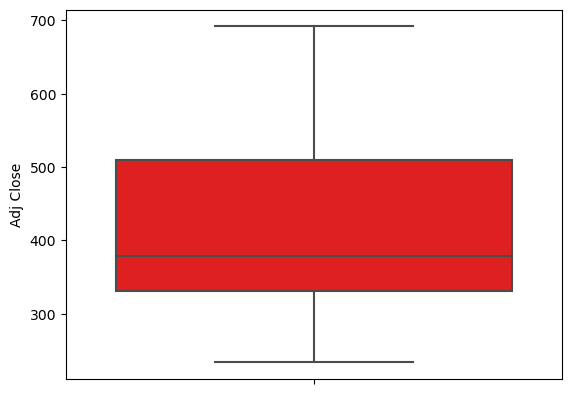

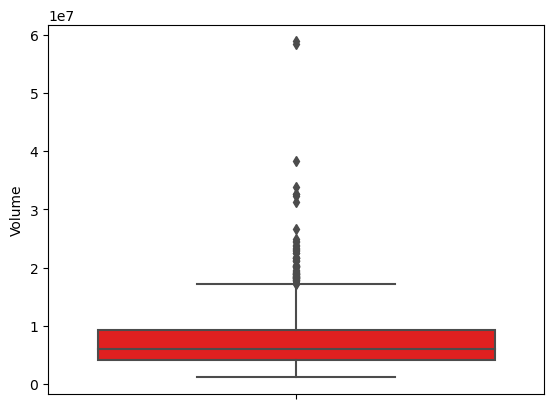

In [7]:
for i in df.columns:
    if df[i].dtype == "float64" or df[i].dtype == "int64":
        sns.boxplot(y=df[i], color='red')
        plt.show();

In [8]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75, 25])
    IQR = Q3-Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    return UL, LL

In [9]:
for column in df.columns:
    if df[column].dtype == "float64" or df[column].dtype == "int64":
        UL, LL = outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | (df[column]<LL), np.nan, df[column])

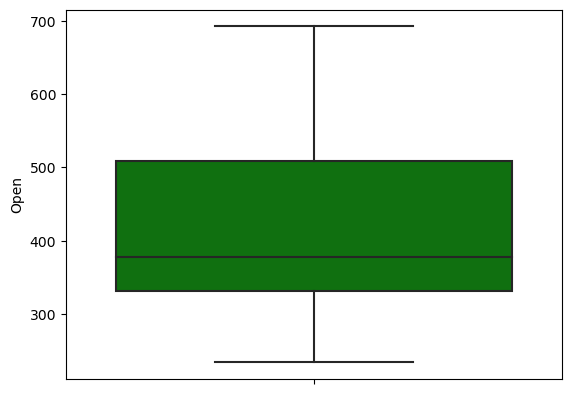

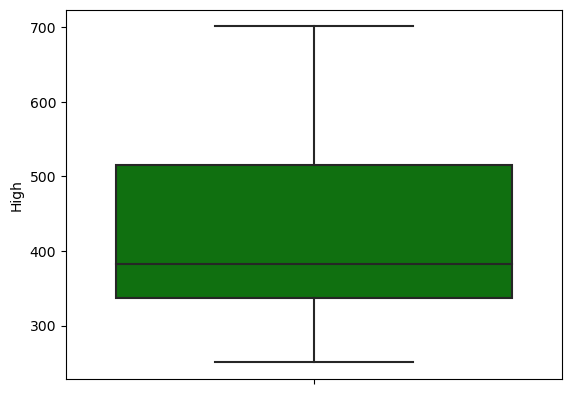

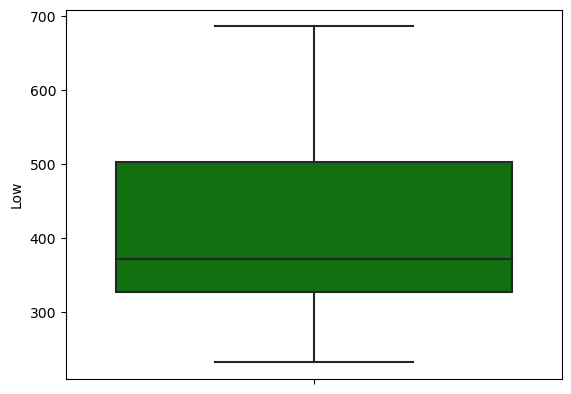

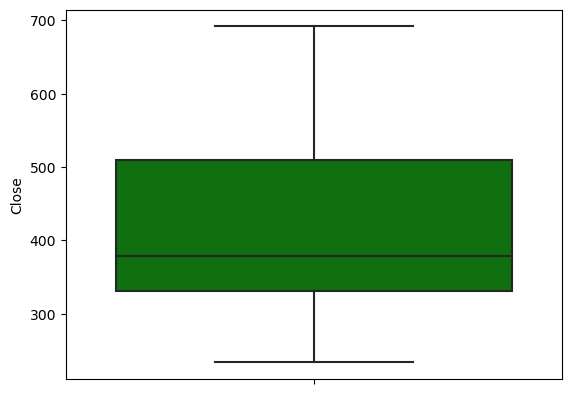

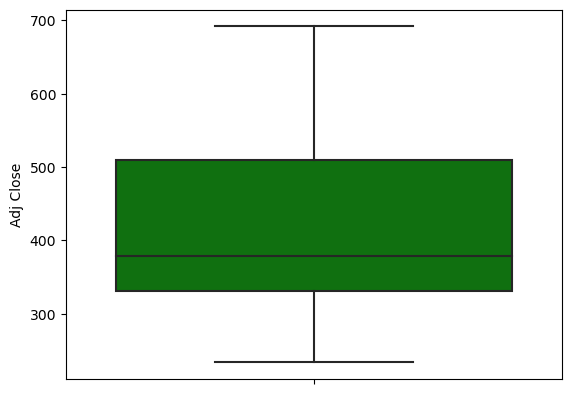

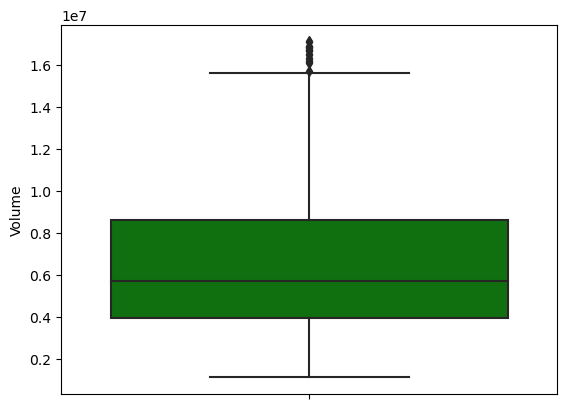

In [10]:
for i in df.columns:
    if df[i].dtype == "float64" or df[i].dtype == "int64":
        sns.boxplot(y=df[i], color='green')
        plt.show();

In [11]:
df.isnull().mean()

Date         0.000000
Open         0.000000
High         0.000000
Low          0.000000
Close        0.000000
Adj Close    0.000000
Volume       0.056492
dtype: float64

In [12]:
df.Volume.mean()

6638694.327731092

In [13]:
df['Volume']=df['Volume'].fillna(df.Volume.mean())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 55.3 KB


<AxesSubplot:>

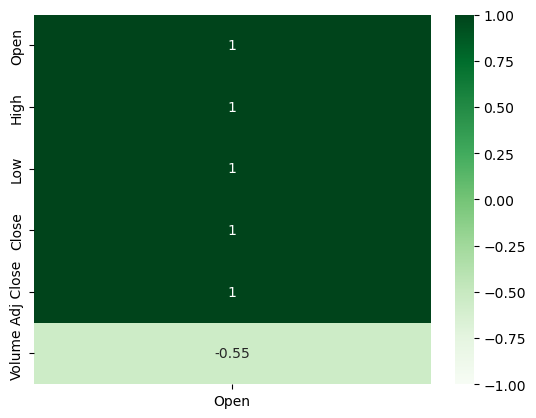

In [15]:
sns.heatmap(df.corr()[['Open']].sort_values(by='Open', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Greens')

In [16]:
x=df[["High","Low","Close","Adj Close","Volume"]].values
y=df.Open

In [17]:
sc=StandardScaler()

In [18]:
sc.fit_transform(x)

array([[-1.4414654 , -1.51014126, -1.52204669, -1.52204669,  1.54726564],
       [-1.45245336, -1.55693083, -1.41616721, -1.41616721,  1.75318884],
       [-1.39980192, -1.37712127, -1.42688452, -1.42688452,  0.68949268],
       ...,
       [ 0.24411318,  0.13121518,  0.0968185 ,  0.0968185 ,  2.26827641],
       [ 0.03607133, -0.07529165, -0.12380989, -0.12380989,  0.96133955],
       [-0.11492402, -0.14635958, -0.0815874 , -0.0815874 ,  0.33659501]])

In [19]:
from sklearn.model_selection import cross_val_score
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'KneghborsRegressor':KNeighborsRegressor()
}

In [20]:
for name, model in models.items():
    scores=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=10,n_jobs=-1)
    print('ss validaton model:{}'.format(name))
    rmse=np.sqrt(-scores)
    rmse_avarage=np.mean(rmse)
    print('AVARAGE RMSE:',rmse_avarage)
    print('*'*100)

ss validaton model:LinearRegression
AVARAGE RMSE: 3.7922056816841208
****************************************************************************************************
ss validaton model:Lasso
AVARAGE RMSE: 3.8398824228343655
****************************************************************************************************
ss validaton model:Ridge
AVARAGE RMSE: 3.7922097162032697
****************************************************************************************************
ss validaton model:GradientBoostingRegressor
AVARAGE RMSE: 8.838761600912656
****************************************************************************************************
ss validaton model:AdaBoostRegressor
AVARAGE RMSE: 11.227813343124193
****************************************************************************************************
ss validaton model:RandomForestRegressor
AVARAGE RMSE: 8.621411861994122
******************************************************************************************

In [21]:
lr=LinearRegression()

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
print("model trained with {}".format(lr))
training_score = lr.score(x_train, y_train)*100
testing_score = lr.score(x_test, y_test)*100
score = r2_score(y_test, lr.predict(x_test))*100
mae = mean_absolute_error(y_test, lr.predict(x_test))
mse = mean_squared_error(y_test, lr.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with LinearRegression()
r2score:  99.8566952192033
training_score:  99.87642535297965
testing_score:  99.8566952192033
mae:  3.045402538581772
mse:  16.22594331786828
rmse_test:  4.028143904811282


In [29]:
y_pred=lr.predict(x)

In [30]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,262.000000,262.234036
1,247.699997,250.312857
2,266.579987,271.032405
3,267.079987,264.750922
4,253.850006,243.845533
...,...,...
1004,401.970001,405.230320
1005,432.959991,433.774684
1006,448.250000,445.185659
1007,421.440002,424.036846


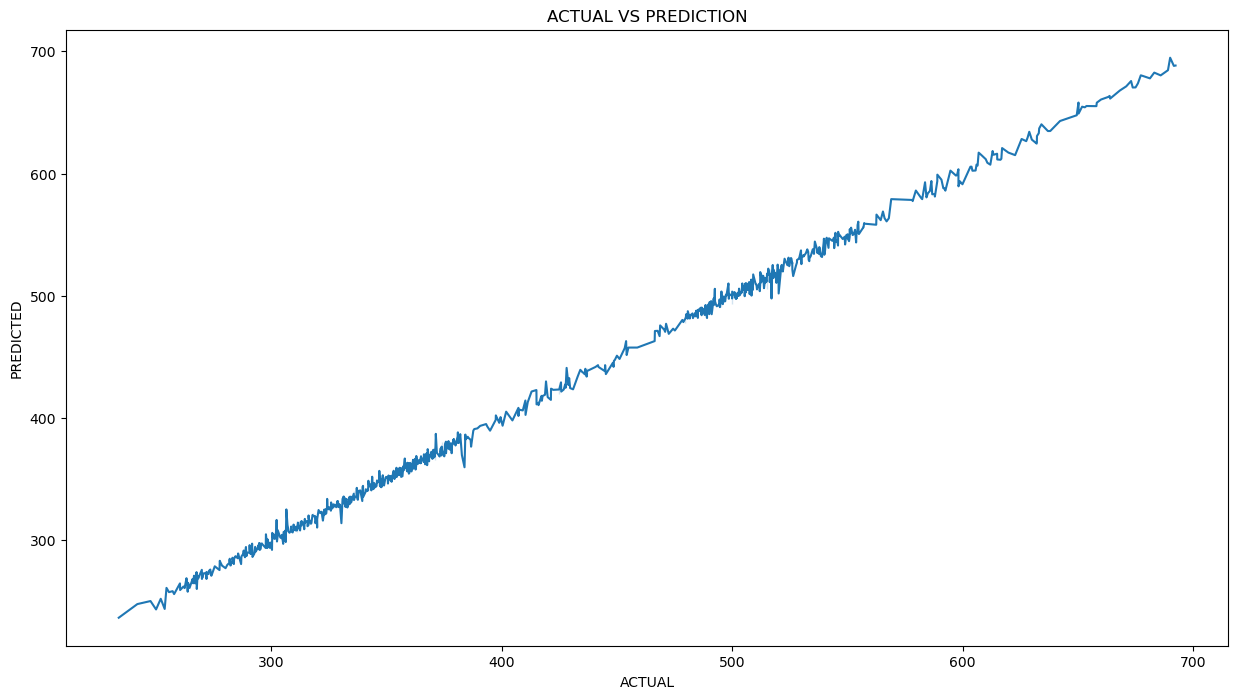

In [31]:
plt.figure(figsize=(15,8))
sns.lineplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()